# Stack Overflow Survey Trends

**Understanding developer trends in Stack Overflow survey data**

This is an Off-Platform Project provided by Codecademy's Data Science: Analyst career track in the *Handling Missing Data* course, inside of the *Data Wrangling, Cleaning, and Tidying* Unit.

## Project Overview

You work for a staffing agency that specializes in finding qualified candidates for development roles. One of your latest clients is growing rapidly and wants to understand what kinds of developers they can hire, and to understand general trends of the technology market. Your organization has access to this [Stack Overflow dataset](https://static-assets.codecademy.com/Courses/handling-missing-data/stackoverflow-project/developer_dataset.csv.zip?_gl=1*lbwq7o*_ga*NDE0MTMwODY3OC4xNjkxNjI5Mzc4*_ga_3LRZM6TM9L*MTcwODM4ODY5My4yMTYuMS4xNzA4Mzg5MjM1LjUzLjAuMA..), which consists of survey responses by developers all over the world for the last few years.

Your project is to put together several statistical analyses about the community to educate your client about the potential hiring market for their company.

## Project Steps

### Explore Data

You decide to start by performing some **Exploratory Data Analysis (EDA)**. This will provide you with a high-level understanding of the data fields, as well as help you identify which columns have missing data. In this case, you load the dataset into a `pandas` DataFrame and call it `df`. Take a moment to explore which columns you have in the data.

In [1]:
# Import the pandas library to read csv files
import pandas as pd

df = pd.read_csv('developer_dataset.csv')
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/var/folders/dz/csjpb9qj4dqf_c5tnq_cjz8c0000gn/T/ipykernel_70318/787547253.py:4: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


We notice that the `RespondentID`, `Year`, and `Country` can be used to identify a person in our data.

Their experiences can be found via `LanguageWorkedWith`, `DatabaseWorkedWith`, `UndergradMajor`.

Information about what they might want to do in the future are contained in `LanguagedDesireNextYear`, `DatabaseDesireNextYear`, 

We will now inspect the NaN values of the dataset. Note that the survey questions were optional, so we can expect that we will have significant NaN values throughout the dataset. We will use `df.count()` to see where we are seeing NaN values.

In [2]:
# Show the total counts for each of the columns
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

We will perform some basic summary statistics on the dataset to understand the 
- average values
- max values
- min values
- the number of missing data points
for our numerical columns. We will use the `.describe()` function.

In [3]:
# Provide the summary statistics
df.describe().round()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.0,111209.0,94793.0,91333.0,51089.0
mean,19262.0,2019.0,10.0,125178.0,41.0
std,11767.0,1.0,8.0,246122.0,14.0
min,1.0,2018.0,0.0,0.0,1.0
25%,9268.0,2018.0,4.0,46000.0,40.0
50%,18535.0,2019.0,8.0,79000.0,40.0
75%,28347.0,2019.0,14.0,120000.0,42.0
max,42857.0,2020.0,50.0,2000000.0,475.0


The summary statistics shown above desribe the center and spread of our quantitative variables. 

The `YearsCodePro` and `ConvertedComp` have some missing values. `ConvertedComp` also has a seemingly high standard deviation with **246122.0**. We might need to inspect this variable further to see why the spread is high. It could be due to outlier compensation values, especially when the median value is very small compared to the maximum value.

It seems that the `WorkWeekHrs` has a significant number of NaN values. In addition, it has a max value of **475.0** hours; which would mean that the person worked about 20 hours a day. This could mean that some of the datapoints are erroneously inputted, and that there may be additional mistakes throughout the dataset.

### Delete Highly Missing Data

We notice that some columns have a very large amount of NaN values. We recall that we can safely remove columns with ~60% or more missing data because it is unlikely to gain any accurate statistical analysis that represents the developers who filled out the survey.

In [4]:
# Define the max number of rows in a column
maxrows = df['RespondentID'].count()
remove_column = []
print('% Missing Data: ')
print((1 - df.count() / maxrows) * 100)

% Missing Data: 
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


We will assume that it is safe to remove 
- `NewJobHunt`
- `NewJobHuntResearch`
- `NewLearn`

as these columns have more than 60% of its data missing.

In [5]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
       axis = 1,
       inplace = True)

### Analyze Developers by Country

We will investigate the distribution of employment and developer type from a geographical (`Country`) perspective.

We know that `Employment` and `DevType` have missing data, so we will need to determine what kind of missing data we have for both of the variables in order to create a solution to address the NaN values.

/Users/thejjserg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/thejjserg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


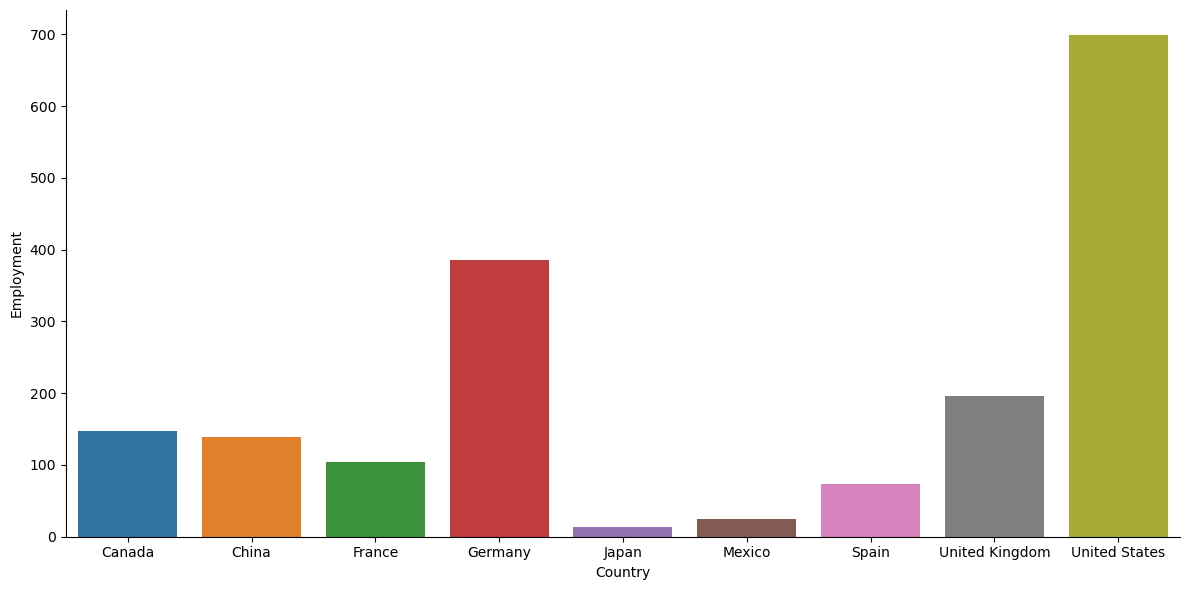

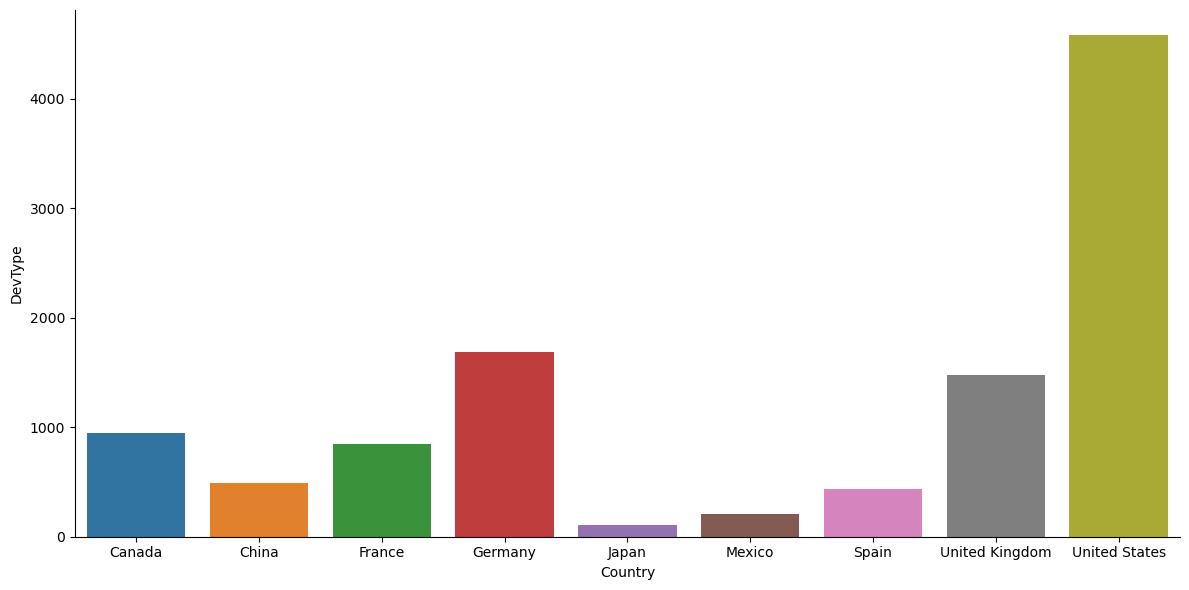

In [7]:
# Import the following libraries
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()

# Find the missing data
missing_data = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(data = missing_data,
               kind = 'bar',
               x = 'Country',
               y = 'Employment',
               height = 6, aspect = 2)
B = sns.catplot(data = missing_data,
               kind = 'bar',
               x = 'Country',
               y = 'DevType',
               height = 6, aspect = 2)


The data doesn't appear to be missing for any specific country significantly more than any other. We understand that the missing data appears to scale with the relative size of each country. Note that the United States and Germany have more developers (on average) than the other countries, and this explains why they have more missing data points. Hence, this data appears to scale with the relative size of each country.

Therefore, we determine that the missing data for these two columns can be categorized as `MCAR`. `MCAR` or `Missing Completely at Random` means that, for any reason, data is just missing. Each variable for every observation is equally likely to be missing. 

Since we have determined the missing data to be categorized as `MCAR`, we can safely delete the rows that have missing data in these columns. We will use **Pairwise Deletion** to only delete the rows that have missing data for *either* `Employment` or `DevType`.